In [659]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [660]:
# ---------------------------------------------------------------------------
# ACS WIL Data Analytics Project - Customer Churn Analysis
# ---------------------------------------------------------------------------

# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# read in the csv file and load the file into the dataframe
dataFile = r'C:\Users\dpang\anaconda3\Lib\site-packages\pandas\io\SkillSoft\Dataset_(ATS)-1.csv'
dataFrame = pd.read_csv(dataFile, sep = ',')

# displaying the number of instances(rows) and attributes(cols) for checking
print('Number of Instances =', dataFrame.shape[0])
print('Number of Attributes =', dataFrame.shape[1])

Number of Instances = 7043
Number of Attributes = 10


In [661]:
# understanding the dataset
df_info = dataFrame.info()
print("-----------------------------------------------------------------")
dataFrame.head(10) # first 10 rows of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           7043 non-null   object 
 1   SeniorCitizen    7043 non-null   int64  
 2   Dependents       7043 non-null   object 
 3   tenure           7043 non-null   int64  
 4   PhoneService     7043 non-null   object 
 5   MultipleLines    7043 non-null   object 
 6   InternetService  7043 non-null   object 
 7   Contract         7043 non-null   object 
 8   MonthlyCharges   7043 non-null   float64
 9   Churn            7043 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 550.4+ KB
-----------------------------------------------------------------


,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,Churn
0,Female,0,No,1,No,No,DSL,Month-to-month,29.85,No
1,Male,0,No,34,Yes,No,DSL,One year,56.95,No
2,Male,0,No,2,Yes,No,DSL,Month-to-month,53.85,Yes
3,Male,0,No,45,No,No,DSL,One year,42.30,No
4,Female,0,No,2,Yes,No,Fiber optic,Month-to-month,70.70,Yes
5,Female,0,No,8,Yes,Yes,Fiber optic,Month-to-month,99.65,Yes
6,Male,0,Yes,22,Yes,Yes,Fiber optic,Month-to-month,89.10,No
7,Female,0,No,10,No,No,DSL,Month-to-month,29.75,No
8,Female,0,No,28,Yes,Yes,Fiber optic,Month-to-month,104.80,Yes
9,Male,0,Yes,62,Yes,No,DSL,One year,56.15,No


In [662]:
# check if there is any missing data points

attributes = dataFrame.columns

# going through each column to look for missing data
for att in attributes:
        #getting the total missing value in each attribute
        totalMissingValues = dataFrame[att].isnull().sum()

print("Total Missing Data:", totalMissingValues)

Total Missing Data: 0


In [663]:
# more specific info on missing data points

missing_values = dataFrame.isnull().sum()
missing_values

gender             0
SeniorCitizen      0
Dependents         0
tenure             0
PhoneService       0
MultipleLines      0
InternetService    0
Contract           0
MonthlyCharges     0
Churn              0
dtype: int64

In [664]:
# getting the total number of duplicates rows
print("Total number of duplicated rows:", dataFrame.duplicated().sum())

print("---------------------------------------------------------------------------------")

# checking for duplicates, keeping the first occurrence as non-duplicate
duplicates = dataFrame.duplicated(keep='first')
print("Duplicate rows (except first occurrence):")
dataFrame[duplicates]

Total number of duplicated rows: 103
---------------------------------------------------------------------------------
Duplicate rows (except first occurrence):


,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,Churn
100,Male,0,No,1,Yes,No,DSL,Month-to-month,20.20,No
772,Female,0,No,1,Yes,No,DSL,Month-to-month,19.90,Yes
885,Male,0,No,1,Yes,No,DSL,Month-to-month,20.05,No
964,Male,0,No,1,Yes,No,DSL,Month-to-month,45.70,Yes
987,Male,0,No,1,Yes,No,DSL,Month-to-month,19.75,No
...,...,...,...,...,...,...,...,...,...,...
6854,Male,0,No,2,Yes,No,DSL,Month-to-month,20.00,No
6875,Female,0,No,64,Yes,No,DSL,Two year,19.45,No
6924,Male,0,No,1,Yes,No,Fiber optic,Month-to-month,69.35,Yes
6977,Male,0,No,24,Yes,No,DSL,Month-to-month,49.70,No


In [665]:
# drop all duplicates except the first occurrence
dataFrame = dataFrame.drop_duplicates(keep='first')

# Reset the index of the cleaned DataFrame
dataFrame = dataFrame.reset_index(drop=True)
print("\nDataFrame after removing duplicates (keeping first occurrence):")
dataFrame


DataFrame after removing duplicates (keeping first occurrence):


,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,Churn
0,Female,0,No,1,No,No,DSL,Month-to-month,29.85,No
1,Male,0,No,34,Yes,No,DSL,One year,56.95,No
2,Male,0,No,2,Yes,No,DSL,Month-to-month,53.85,Yes
3,Male,0,No,45,No,No,DSL,One year,42.30,No
4,Female,0,No,2,Yes,No,Fiber optic,Month-to-month,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...
6935,Male,0,Yes,24,Yes,Yes,DSL,One year,84.80,No
6936,Female,0,Yes,72,Yes,Yes,Fiber optic,One year,103.20,No
6937,Female,0,Yes,11,No,No,DSL,Month-to-month,29.60,No
6938,Male,1,No,4,Yes,Yes,Fiber optic,Month-to-month,74.40,Yes


In [666]:
# dataFrame['Dependents'].unique()

for att in attributes:
        # looking at the values of the columns
        print("Column:", att, "-->", dataFrame[att].unique())

Column: gender --> ['Female' 'Male']
Column: SeniorCitizen --> [0 1]
Column: Dependents --> ['No' 'Yes']
Column: tenure --> [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService --> ['No' 'Yes']
Column: MultipleLines --> ['No' 'Yes']
Column: InternetService --> ['DSL' 'Fiber optic']
Column: Contract --> ['Month-to-month' 'One year' 'Two year']
Column: MonthlyCharges --> [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Column: Churn --> ['No' 'Yes']


In [667]:
# encoding categorical variables

# binary mapping(binary categorical)
dataFrame['gender'] = dataFrame['gender'].map({'Female': 0, 'Male': 1})
dataFrame['Dependents'] = dataFrame['Dependents'].map({'No': 0, 'Yes': 1})
dataFrame['PhoneService'] = dataFrame['PhoneService'].map({'No': 0, 'Yes': 1})
dataFrame['MultipleLines'] = dataFrame['MultipleLines'].map({'No': 0, 'Yes': 1})
dataFrame['InternetService'] = dataFrame['InternetService'].map({'DSL': 0, 'Fiber optic': 1})
dataFrame['Churn'] = dataFrame['Churn'].map({'No': 0, 'Yes': 1})

# one-hot encoding(Multi-class Categorical Variables)
encoded_dataframe = pd.get_dummies(dataFrame, columns = ['Contract'])

# Check for NaN values in the relevant columns
print(encoded_dataframe[['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year']].isnull().sum())

# Fill NaN values with 0
encoded_dataframe['Contract_Month-to-month'] = encoded_dataframe['Contract_Month-to-month'].fillna(0)
encoded_dataframe['Contract_One year'] = encoded_dataframe['Contract_One year'].fillna(0)
encoded_dataframe['Contract_Two year'] = encoded_dataframe['Contract_Two year'].fillna(0)

# Convert boolean columns to integers
encoded_dataframe['Contract_Month-to-month'] = encoded_dataframe['Contract_Month-to-month'].astype(int)
encoded_dataframe['Contract_One year'] = encoded_dataframe['Contract_One year'].astype(int)
encoded_dataframe['Contract_Two year'] = encoded_dataframe['Contract_Two year'].astype(int)

# displaying the final encoded version of the dataset --> most accurate so far
encoded_dataframe

Contract_Month-to-month    0
Contract_One year          0
Contract_Two year          0
dtype: int64


,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,MonthlyCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,0,0,1,0,0,0,29.85,0,1,0,0
1,1,0,0,34,1,0,0,56.95,0,0,1,0
2,1,0,0,2,1,0,0,53.85,1,1,0,0
3,1,0,0,45,0,0,0,42.30,0,0,1,0
4,0,0,0,2,1,0,1,70.70,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6935,1,0,1,24,1,1,0,84.80,0,0,1,0
6936,0,0,1,72,1,1,1,103.20,0,0,1,0
6937,0,0,1,11,0,0,0,29.60,0,1,0,0
6938,1,1,0,4,1,1,1,74.40,1,1,0,0


In [668]:
# Statistical summary of numerical variables

# dataFrame.describe()
encoded_dataframe.describe()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,MonthlyCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year
count,6940.000000,6940.000000,6940.000000,6940.000000,6940.000000,6940.000000,6940.000000,6940.000000,6940.000000,6940.000000,6940.000000,6940.000000
mean,0.504323,0.163977,0.301729,32.612392,0.902017,0.425937,0.443660,65.211081,0.265994,0.547262,0.211527,0.241210
std,0.500017,0.370281,0.459041,24.461349,0.297313,0.494520,0.496851,29.904985,0.441893,0.497797,0.408421,0.427848
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,39.100000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,70.600000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,56.000000,1.000000,1.000000,1.000000,90.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,118.750000,1.000000,1.000000,1.000000,1.000000


In [669]:
# Appropriate scaling techniques are applied to normalise the data, enhancing model performance.
# using min-max scaling to scale the preprocessed dataset

# making a copy of the processed dataframe
df_copy = encoded_dataframe.copy()
df_copy

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,MonthlyCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,0,0,1,0,0,0,29.85,0,1,0,0
1,1,0,0,34,1,0,0,56.95,0,0,1,0
2,1,0,0,2,1,0,0,53.85,1,1,0,0
3,1,0,0,45,0,0,0,42.30,0,0,1,0
4,0,0,0,2,1,0,1,70.70,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6935,1,0,1,24,1,1,0,84.80,0,0,1,0
6936,0,0,1,72,1,1,1,103.20,0,0,1,0
6937,0,0,1,11,0,0,0,29.60,0,1,0,0
6938,1,1,0,4,1,1,1,74.40,1,1,0,0


In [670]:
# removing the target variable 'Churn', and only scaling the feature columns

# separate the target variable 'Churn'
targetColumn = encoded_dataframe['Churn']
# targetVar.head(20)
targetColumn

0       0
1       0
2       1
3       0
4       1
       ..
6935    0
6936    0
6937    0
6938    1
6939    0
Name: Churn, Length: 6940, dtype: int64

In [671]:
# drop the target column('Churn') from the dataset(encoded_dataframe)
# create new features_dataframe to store the dataframe(without target column 'Churn')
# features_dataframe here only contains all the feature columns
features_dataframe = encoded_dataframe.drop(columns=['Churn'])
features_dataframe

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,MonthlyCharges,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,0,0,1,0,0,0,29.85,1,0,0
1,1,0,0,34,1,0,0,56.95,0,1,0
2,1,0,0,2,1,0,0,53.85,1,0,0
3,1,0,0,45,0,0,0,42.30,0,1,0
4,0,0,0,2,1,0,1,70.70,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6935,1,0,1,24,1,1,0,84.80,0,1,0
6936,0,0,1,72,1,1,1,103.20,0,1,0
6937,0,0,1,11,0,0,0,29.60,1,0,0
6938,1,1,0,4,1,1,1,74.40,1,0,0


In [672]:
features_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6940 entries, 0 to 6939
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   6940 non-null   int64  
 1   SeniorCitizen            6940 non-null   int64  
 2   Dependents               6940 non-null   int64  
 3   tenure                   6940 non-null   int64  
 4   PhoneService             6940 non-null   int64  
 5   MultipleLines            6940 non-null   int64  
 6   InternetService          6940 non-null   int64  
 7   MonthlyCharges           6940 non-null   float64
 8   Contract_Month-to-month  6940 non-null   int32  
 9   Contract_One year        6940 non-null   int32  
 10  Contract_Two year        6940 non-null   int32  
dtypes: float64(1), int32(3), int64(7)
memory usage: 515.2 KB


In [673]:
# normalising data
# for attributes that have very large values
# do normalisation to reduce variance

# print("\nData Normalisation to handle attributes with very large values")

# select the numerical columns for scaling and returns a numeric DataFrame(featuresDF_numeric)
featuresDF_numeric = features_dataframe.select_dtypes(include='number')

# apply min-max scaling to the numerical columns(featuresDF_numeric-DataFrame of numerical columns)
scaled_dataFrame = MinMaxScaler().fit_transform(featuresDF_numeric)

# convert the scaled data back to a DataFrame with the original numerical column names
scaled_numerical_df = pd.DataFrame(scaled_dataFrame, columns=featuresDF_numeric.columns, index=features_dataframe.index)

# replace the original numerical columns in the features DataFrame with the scaled ones
features_dataframe[featuresDF_numeric.columns] = scaled_numerical_df

# add the 'Churn' column (target) back to the scaled dataset
scaled_df_final = pd.concat([features_dataframe, targetColumn], axis=1)

# display final scaled dataframe
scaled_df_final

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,MonthlyCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,Churn
0,0.0,0.0,0.0,0.013889,0.0,0.0,0.0,0.115423,1.0,0.0,0.0,0
1,1.0,0.0,0.0,0.472222,1.0,0.0,0.0,0.385075,0.0,1.0,0.0,0
2,1.0,0.0,0.0,0.027778,1.0,0.0,0.0,0.354229,1.0,0.0,0.0,1
3,1.0,0.0,0.0,0.625000,0.0,0.0,0.0,0.239303,0.0,1.0,0.0,0
4,0.0,0.0,0.0,0.027778,1.0,0.0,1.0,0.521891,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6935,1.0,0.0,1.0,0.333333,1.0,1.0,0.0,0.662189,0.0,1.0,0.0,0
6936,0.0,0.0,1.0,1.000000,1.0,1.0,1.0,0.845274,0.0,1.0,0.0,0
6937,0.0,0.0,1.0,0.152778,0.0,0.0,0.0,0.112935,1.0,0.0,0.0,0
6938,1.0,1.0,0.0,0.055556,1.0,1.0,1.0,0.558706,1.0,0.0,0.0,1


In [674]:
# save the scaled dataset to a new csv file
scaled_df_final.to_csv(r'C:\Users\dpang\anaconda3\Lib\site-packages\pandas\io\SkillSoft\Scaled_dataset.csv', index=False)


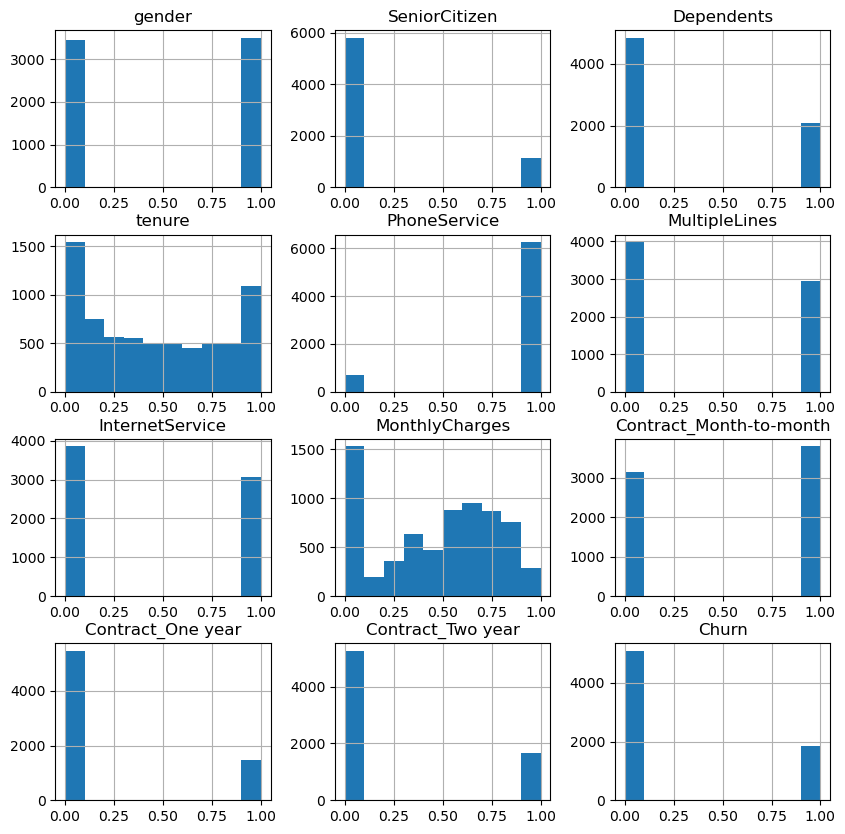

In [675]:
# scaled_df_final.plot.hist()
scaled_df_final.hist(figsize=(10,10))
plt.show()

In [676]:
# splitting the dataset into distinct training and testing sets 
# saving the training and testing sets into their own folders

# scaled_df_final
print('Number of Instances =', scaled_df_final.shape[0])

# drop the target column('Churn') from the scaled dataset
x = scaled_df_final.drop(columns=['Churn']) #features
y = scaled_df_final['Churn'] #target

Number of Instances = 6940


In [677]:
# randomising data split
# splitting the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


In [678]:
# saving the training data and testing data into their respective folder
X_train.to_csv('./TrainingSet/X_train.csv', index=False)
X_test.to_csv('./TestSet/X_test.csv', index=False)
y_train.to_csv('./TrainingSet/y_train.csv', index=False)
y_test.to_csv('./TestSet/y_test.csv', index=False)

# the following can be used to visualise the index of the dataset(index shows randomise dataset)
# X_train.to_csv('./TrainingSet/X_train.csv', index=True) 

C:\Users\dpang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dpang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dpang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dpang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

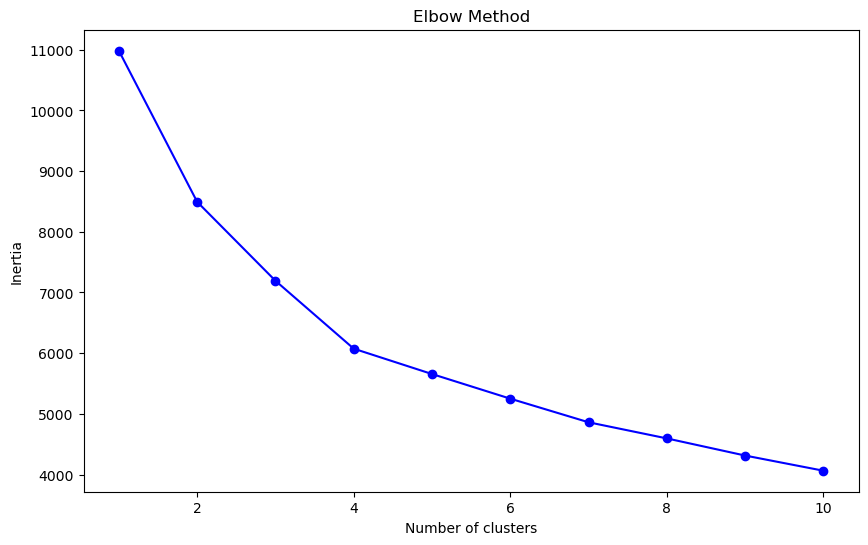

In [679]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
K = range(1, 11)  # Trying for 1 to 10 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)  # using features from training set
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [680]:
#From the above diagram we can see that the elbow appears to be around 4 clusters.



optimal_k = 4
# Train K-Means model on the training set
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_train)

# Save the labels for later use
y_train_clusters = kmeans.labels_


C:\Users\dpang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [681]:
# If you want to add the cluster labels to the training dataset for further analysis:
X_train['Cluster'] = y_train_clusters

In [682]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)


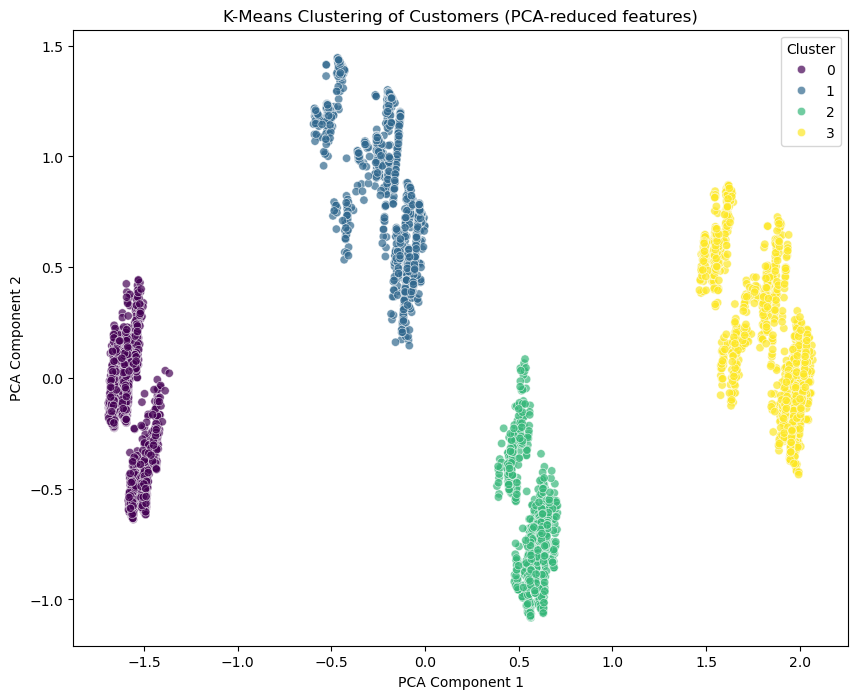

In [683]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y_train_pred, palette='viridis', legend='full', alpha=0.7)
plt.title('K-Means Clustering of Customers (PCA-reduced features)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


In [684]:
# Example: Analyzing average features in each cluster
cluster_labels = X_train.groupby('Cluster').mean()
print(cluster_labels)

# Based on these averages, you can assign descriptive labels:
# E.g., if Cluster 0 has high tenure and low charges, label it "Loyal Customers"
# Modify this according to your analysis


           gender  SeniorCitizen  Dependents    tenure  PhoneService  \
Cluster                                                                
0        0.503839       0.308328    0.167159  0.304948      1.000000   
1        0.498858       0.088347    0.460015  0.788853      0.913176   
2        0.503341       0.100965    0.258352  0.197538      0.773571   
3        0.511259       0.128440    0.361134  0.585812      0.904921   

         MultipleLines  InternetService  MonthlyCharges  \
Cluster                                                   
0             0.580626         0.996456        0.683198   
1             0.511043         0.257426        0.423668   
2             0.150705         0.000000        0.235539   
3             0.428691         0.371977        0.471125   

         Contract_Month-to-month  Contract_One year  Contract_Two year  
Cluster                                                                 
0                            1.0                0.0               